# 线性回归：矩阵求逆方法

本脚本用TensorFlow实现，利用矩阵求逆方法来实现线性回归。

考虑系统$A \cdot x = y$, 我们用如下公式求解线性回归问题。

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$

其中$x$是我们的参数矩阵（长度为$F+1$，这里的$F$是特征的长度）。这里，$A$，我们的设计矩阵具有如下模式：

$$
A=
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1F} \\
    1 & x_{21} & x_{22} & \dots  & x_{2F} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots  & x_{nF}
\end{bmatrix}
$$

其中$F$是独立特征的数量，并且$n$是点的个数。对于超定方程（超定系统，对应欠定系统），有$n > F$。记住我们系统的一个观测长度为$F+1$，且第$i^{th}$点是：

$$
point_{i} = \left(y_{i}, x_{i1}, x_{i2}, \dots, x_{iF} \right)
$$


对于本脚本，我们仅考虑一个2维系统（$F=1$），因此我们在最后画出结果。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

为了描述我们目标，我们随机生成数据来拟合。

x的值是在0到10之间的100个均匀分布的值序列

y的值应该服从$y=x$，但是我们要在原始的x序列上添加噪声（服从$N(0,1)$的正态分布）

In [3]:
# 创建数据
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

我们创建一个设计矩阵，$A$，该矩阵包含一列1数据和x值

In [4]:
# 创建设计矩阵
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

我们现在用Numpy创建y值为一个矩阵。

在我们有y值和设计矩阵之后，我们从它们创建张量。

In [10]:
# 格式化y矩阵
y = np.transpose(np.matrix(y_vals))

# 创建张量
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

现在我们用TensorFlow运算来求解参数矩阵。

In [11]:
# 矩阵求逆
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

运行结果，并且从参数矩阵中获取slope和intercept

In [12]:
solution_eval = sess.run(solution)

# 分解因子
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

现在我们打印结果，并且画出最有拟合线

In [13]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# 得到最有拟合曲线
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 0.9931571039272492
y_intercept: 0.057714938248550396


我们使用Matplotlib来画出结果。

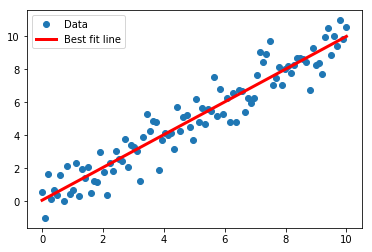

In [14]:
# 画出结果
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()